# EDA Images

In this notebook we focus on the exploratory analysis of the visual data from the ODIR-5K dataset. Each patient has fundus images of the left and right eyes, accompanied by diagnostic labels. Our goal is to examine the structure, availability, and basic characteristics of the image data. 


In [ ]:
# Import Librarys
import pandas as pd
import numpy as np
import os 
from PIL import Image  
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


### Load and inspect the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../full_df.csv")

# Basic info about the dataset
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (6392, 19)


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [4]:
# Count total unique IDs vs total rows
total_rows = df.shape[0]
unique_ids = df['ID'].nunique()

print(f"Total rows: {total_rows}")
print(f"Unique patient IDs: {unique_ids}")


Total rows: 6392
Unique patient IDs: 3358


Note that some patients have only one eye image available (either left or right), as the dataset does not always include both eyes for every individual.

In [5]:
# Explore image sizes 
image_dir = "../ODIR-5K/ODIR-5K/Training Images"

image_sizes = []
corrupted_images = []

for filename in df['filename']:
    path = os.path.join(image_dir, filename)
    try:
        with Image.open(path) as img:
            image_sizes.append(img.size)
    except:
        corrupted_images.append(filename)

print("Different image sizes:")
for size in set(image_sizes):
    print(size)

print("Corrupted images:")
print(corrupted_images)

Different image sizes:
(1895, 1424)
(3696, 2448)
(2584, 2000)
(2196, 1958)
(758, 705)
(929, 788)
(1620, 1444)
(1471, 1473)
(2196, 1960)
(5184, 3456)
(3888, 2592)
(3280, 2480)
(949, 784)
(2057, 1545)
(2304, 2048)
(2736, 1824)
(1677, 1260)
(1380, 1382)
(2592, 1944)
(2124, 2056)
(1725, 1721)
(4288, 2848)
(1467, 1471)
(1476, 1483)
(924, 805)
(2976, 2976)
(2414, 2416)
(2142, 1609)
(2785, 2350)
(1536, 1152)
(2584, 1951)
(2976, 1984)
(1936, 1296)
(947, 800)
(1468, 1472)
(741, 713)
(868, 793)
(1444, 1444)
(2584, 1990)
(925, 799)
(1470, 1472)
(2400, 2400)
(2304, 1728)
(4496, 3000)
(250, 188)
(1468, 1300)
(959, 776)
(1974, 1483)
(320, 316)
(2480, 1919)
(1956, 1934)
(1624, 1232)
(2065, 1850)
(957, 771)
(955, 783)
(2272, 2048)
(2090, 2080)
(2464, 1632)
(930, 790)
(3264, 2448)
(2100, 2100)
(763, 716)
(1920, 894)
(1469, 1470)
(3216, 2136)
(2592, 1728)
(800, 600)
(1920, 1296)
(2992, 2000)
(2048, 1536)
(972, 785)
(1470, 1471)
(727, 716)
(1920, 1088)
(2232, 1677)
(2960, 2935)
(3504, 2336)
(2460, 1904)


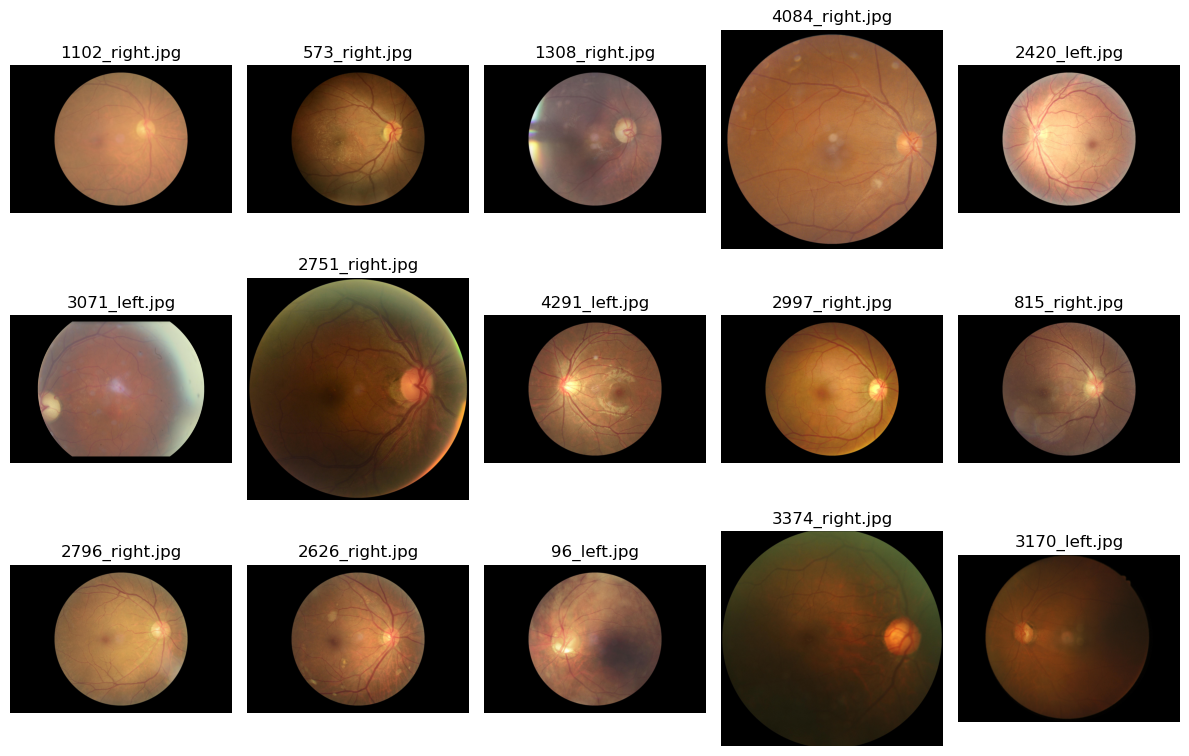

In [6]:
# Show random images
sample = df.sample(15)

# start plotting
plt.figure(figsize=(12, 8))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    path = os.path.join(image_dir, sample.iloc[i]['filename'])
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(sample.iloc[i]['filename'])

plt.tight_layout()
plt.show()


In [7]:
test_dir = "../ODIR-5K/ODIR-5K/Testing Images" # Nota (Leti): Creo que deberíamos hacer la exploración con el archivo de Trainig Images, que son las que contienen las etiquetas, el conjunto de Test no lo deberíamos usar. Em la celda 5
# Nota (Sara): Estoy de acuerdo con Leti, si usamos las imagenes de Test estariamos haciendo data leak y eso es un fallo gordo.
# había puesto el path: image_dir = "../ODIR-5K/ODIR-5K/Training Images". Y hasta que no hagamos división de test y train, lo llamaría de manera genérica (image_dir).

In [8]:
import os # Nota (Leti): las librearias están arriba en la primera celda, podemos ponerlas todas juntas al inicio, para no repetir código
import pandas as pd

# Obtenemos solo archivos válidos (excluye carpetas ocultas)
test_filenames = [f for f in os.listdir(test_dir) if not f.startswith('.')] # Nota (Leti): cambiaría test_filenames por image_filenames

df_test = pd.DataFrame({'filename': test_filenames})

In [9]:
#Analisis de Size de subconjunto test 
from PIL import Image

image_sizes_test = []  # Nota(Leti): lo mismo, como haríamos el análisis con train, este análisis de Size ya está arriba, en la celda 5, no haría falta repetirlo
corrupted_images_test = []

for filename in df_test['filename']:
    path = os.path.join(test_dir, filename)
    try:
        with Image.open(path) as img:
            image_sizes_test.append(img.size)
    except:
        corrupted_images_test.append(filename)

print("Different image sizes in TEST:")
for size in set(image_sizes_test):
    print(size)

print("Corrupted images in TEST:")
print(corrupted_images_test)

Different image sizes in TEST:
(3504, 2336)
(740, 718)
(2976, 2976)
(2414, 2416)
(2460, 1904)
(1956, 1934)
(1624, 1232)
(2008, 1508)
(940, 798)
(2584, 2000)
(1260, 946)
(1536, 1152)
(2976, 1984)
(1819, 1367)
(1936, 1296)
(3456, 2304)
(1470, 1137)
(2464, 1632)
(1468, 1469)
(3264, 2448)
(2100, 2100)
(2560, 1920)
(1280, 960)
(1920, 894)
(2624, 1968)
(963, 782)
(2584, 1990)
(1444, 1444)
(1440, 1080)
(3216, 2136)
(2196, 1960)
(2400, 2400)
(2304, 1728)
(3280, 2480)
(3888, 2592)
(2592, 1728)
(5184, 3456)
(2057, 1545)
(1747, 1312)
(1920, 1296)
(1468, 1300)
(2736, 1824)
(2080, 2090)
(725, 716)
(3456, 3456)
(2992, 2000)
(2048, 1536)
(1380, 1382)
(2588, 1956)
(2592, 1944)
(1920, 1088)
(2124, 2056)
(1471, 1475)
(1600, 1400)
(1725, 1721)
(1483, 1114)
(2960, 2935)
(962, 777)
(4288, 2848)
(2038, 1531)
Corrupted images in TEST:
[]


In [10]:

#Realizo una comparacion entre Size Train VS Test
print("\n--- COMPARACIÓN ---")   # Nota (Leti): igual, no deberíamos usar el conjunto de Test. De hecho creo que no tiene metadatos ni target asociados (comparar con el full_df), lo vemos, pero creo que para un modelo supervisado no nos valen estas imágenes.
print("Total TRAINING images:", len(image_sizes))
print("Total TESTING images:", len(image_sizes_test))

print("\nUnique sizes in TRAINING:", set(image_sizes))
print("Unique sizes in TESTING:", set(image_sizes_test))

# Tamaños presentes en train pero no en test
print("\nSizes in TRAINING but not in TESTING:")
print(set(image_sizes) - set(image_sizes_test))

# Tamaños presentes en test pero no en train
print("Sizes in TESTING but not in TRAINING:")
print(set(image_sizes_test) - set(image_sizes))


--- COMPARACIÓN ---
Total TRAINING images: 6392
Total TESTING images: 1000

Unique sizes in TRAINING: {(1895, 1424), (3696, 2448), (2584, 2000), (2196, 1958), (758, 705), (929, 788), (1620, 1444), (1471, 1473), (2196, 1960), (5184, 3456), (3888, 2592), (3280, 2480), (949, 784), (2057, 1545), (2304, 2048), (2736, 1824), (1677, 1260), (1380, 1382), (2592, 1944), (2124, 2056), (1725, 1721), (4288, 2848), (1467, 1471), (1476, 1483), (924, 805), (2976, 2976), (2414, 2416), (2142, 1609), (2785, 2350), (1536, 1152), (2584, 1951), (2976, 1984), (1936, 1296), (947, 800), (1468, 1472), (741, 713), (868, 793), (1444, 1444), (2584, 1990), (925, 799), (1470, 1472), (2400, 2400), (2304, 1728), (4496, 3000), (250, 188), (1468, 1300), (959, 776), (1974, 1483), (320, 316), (2480, 1919), (1956, 1934), (1624, 1232), (2065, 1850), (957, 771), (955, 783), (2272, 2048), (2090, 2080), (2464, 1632), (930, 790), (3264, 2448), (2100, 2100), (763, 716), (1920, 894), (1469, 1470), (3216, 2136), (2592, 1728), (80

ANALISIS DETALLADO DE SHAPE 

A la vista de la amplia disparidad de tamaños en los subconjuntos de Train & Test y entre los mismos, paso a realizar un breve analisis de frecuencia por shape. Instalo y empleo la libreria CV2 como libreria mejor orientada para un proyecto de DL ( OJO : hay que tener presente el orden de color que es BGR en vez de RGB)

In [7]:
import os 
import cv2 # Nota (Leti): se puede usar cv2 y PIL indistintamente, lo único es que con cv2 hay que convertir a RGB para mostrar correctamente. Lo vemos y unificamos para usar uno u otro, ya que yo había descargado PIL.
import pandas as pd
from collections import Counter

In [8]:
#Frecuencia por shape Training 

train_dir = "../ODIR-5K/ODIR-5K/Training Images"


df_train = pd.DataFrame({'filename': [f for f in os.listdir(train_dir) if not f.startswith('.')]})
df_train['path'] = df_train['filename'].apply(lambda x: os.path.join(train_dir, x))

#Tamaño   
df_train['shape'] = df_train['path'].apply(lambda x: cv2.imread(x).shape if cv2.imread(x) is not None else None)

#Filtral NULL 
df_train = df_train[df_train['shape'].notnull()] # Ojo! en la celda 3 ya hemos visto que no hay nulos. Mejor evitar redundancias

# Frecuencia
train_shape_freq = df_train['shape'].value_counts()
print("\nFrecuencias de tamaños en TRAINING:")
print(train_shape_freq)


Frecuencias de tamaños en TRAINING:
shape
(1728, 2592, 3)    2146
(1536, 2048, 3)     524
(1728, 2304, 3)     424
(1934, 1956, 3)     390
(1824, 2736, 3)     344
                   ... 
(1444, 1620, 3)       1
(783, 960, 3)         1
(1472, 1470, 3)       1
(1472, 1468, 3)       1
(714, 764, 3)         1
Name: count, Length: 101, dtype: int64


In [ ]:
# (Sara): TO DO en preprocesamiento: Redimensionar todas las imagenes a la misma dimensión (p.e. 1728, 2592, 3 ??)

In [18]:
#Frecuencia por shape Test 
test_dir = "../ODIR-5K/ODIR-5K/Testing Images" 

df_test = pd.DataFrame({'filename': [f for f in os.listdir(test_dir) if not f.startswith('.')]})
df_test['path'] = df_test['filename'].apply(lambda x: os.path.join(test_dir, x))
df_test['shape'] = df_test['path'].apply(lambda x: cv2.imread(x).shape if cv2.imread(x) is not None else None)
df_test = df_test[df_test['shape'].notnull()]

test_shape_freq = df_test['shape'].value_counts()
print("\nFrecuencias de tamaños en TESTING:")
print(test_shape_freq)


Frecuencias de tamaños en TESTING:
shape
(1728, 2592, 3)    274
(1728, 2304, 3)     88
(1536, 2048, 3)     80
(1296, 1936, 3)     38
(1824, 2736, 3)     38
(1984, 2976, 3)     36
(2304, 3456, 3)     36
(1934, 1956, 3)     34
(2592, 3888, 3)     32
(2448, 3264, 3)     30
(1152, 1536, 3)     30
(2000, 2992, 3)     28
(2976, 2976, 3)     26
(1444, 1444, 3)     21
(1944, 2592, 3)     20
(2336, 3504, 3)     18
(1382, 1380, 3)     16
(2480, 3280, 3)     14
(2000, 2584, 3)     14
(2100, 2100, 3)     10
(1632, 2464, 3)      8
(2056, 2124, 3)      8
(2400, 2400, 3)      8
(1721, 1725, 3)      8
(1920, 2560, 3)      6
(2935, 2960, 3)      6
(3456, 5184, 3)      6
(1137, 1470, 3)      6
(960, 1280, 3)       4
(1960, 2196, 3)      4
(1296, 1920, 3)      4
(2136, 3216, 3)      4
(894, 1920, 3)       4
(1990, 2584, 3)      4
(1232, 1624, 3)      2
(1300, 1468, 3)      2
(2090, 2080, 3)      2
(2848, 4288, 3)      2
(1088, 1920, 3)      2
(3456, 3456, 3)      2
(2416, 2414, 3)      2
(1400, 1600, 3)

In [19]:
#Comparacion de frecuencias entre Train y Test con sumatorio de Shape y Acumulado 

# Creacion de dataframes para train y test.   # Nota (Leti): igual, no usaría Test, por lo que no haría falta esta comparación. 
df_train_shapes = train_shape_freq.reset_index()
df_train_shapes.columns = ['shape', 'count_train']

df_test_shapes = test_shape_freq.reset_index()
df_test_shapes.columns = ['shape', 'count_test']

# Fusion
df_shapes = pd.merge(df_train_shapes, df_test_shapes, on='shape', how='outer').fillna(0)

# Orden
df_shapes['total'] = df_shapes['count_train'] + df_shapes['count_test']
df_shapes = df_shapes.sort_values('total', ascending=False)

# Acumulado
df_shapes['acumulado'] = df_shapes['total'].cumsum()

df_shapes.iloc[0:50]

,shape,count_train,count_test,total,acumulado
0,"(1728, 2592, 3)",2146.0,274.0,2420.0,2420.0
1,"(1536, 2048, 3)",524.0,80.0,604.0,3024.0
2,"(1728, 2304, 3)",424.0,88.0,512.0,3536.0
3,"(1934, 1956, 3)",390.0,34.0,424.0,3960.0
4,"(1824, 2736, 3)",344.0,38.0,382.0,4342.0
5,"(1296, 1936, 3)",284.0,38.0,322.0,4664.0
7,"(2304, 3456, 3)",258.0,36.0,294.0,4958.0
6,"(1444, 1444, 3)",267.0,21.0,288.0,5246.0
8,"(1984, 2976, 3)",212.0,36.0,248.0,5494.0
9,"(1152, 1536, 3)",198.0,30.0,228.0,5722.0


In [20]:
#Preparacion de DataFrames para visualizacion 
import pandas as pd

df_train_shapes = train_shape_freq.reset_index()
df_train_shapes.columns = ['shape', 'count_train']

df_test_shapes = test_shape_freq.reset_index()
df_test_shapes.columns = ['shape', 'count_test']


df_shapes = pd.merge(df_train_shapes, df_test_shapes, on='shape', how='outer').fillna(0)


df_shapes['count_train'] = df_shapes['count_train'].astype(int)
df_shapes['count_test'] = df_shapes['count_test'].astype(int)


df_shapes['total'] = df_shapes['count_train'] + df_shapes['count_test']
df_shapes = df_shapes.sort_values('total', ascending=False)

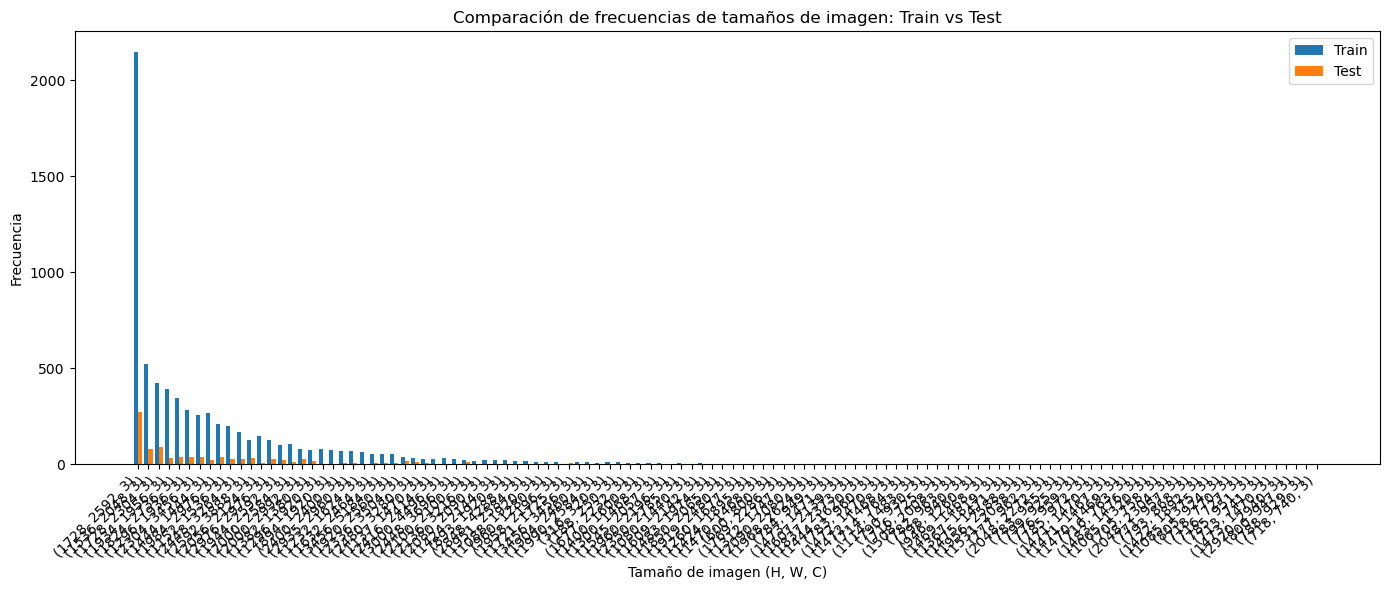

In [21]:
#Graficas de shapes Train vs Test

import matplotlib.pyplot as plt
import numpy as np

# eje X
df_shapes['shape_str'] = df_shapes['shape'].astype(str) # Nota (Leti): Solo sería para Train. Aunque creo este gráfico es complicado de visualizar por la cantidad de tamaños diferentes.
# esta gráfica que información nos aportaría? porque queremos el tamaño más frecuente para redimensionar a ese tamaño? aunque igual no podemos si usamos una ResNet.. sería solo a modo informativo?

x = np.arange(len(df_shapes))  
width = 0.4  

plt.figure(figsize=(14, 6))


plt.bar(x - width/2, df_shapes['count_train'], width, label='Train')
plt.bar(x + width/2, df_shapes['count_test'], width, label='Test')


plt.xlabel('Tamaño de imagen (H, W, C)')
plt.ylabel('Frecuencia')
plt.title('Comparación de frecuencias de tamaños de imagen: Train vs Test')
plt.xticks(x, df_shapes['shape_str'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
#Definición de acumulado para visualización
df_shapes['acumulado'] = df_shapes['total'].cumsum()

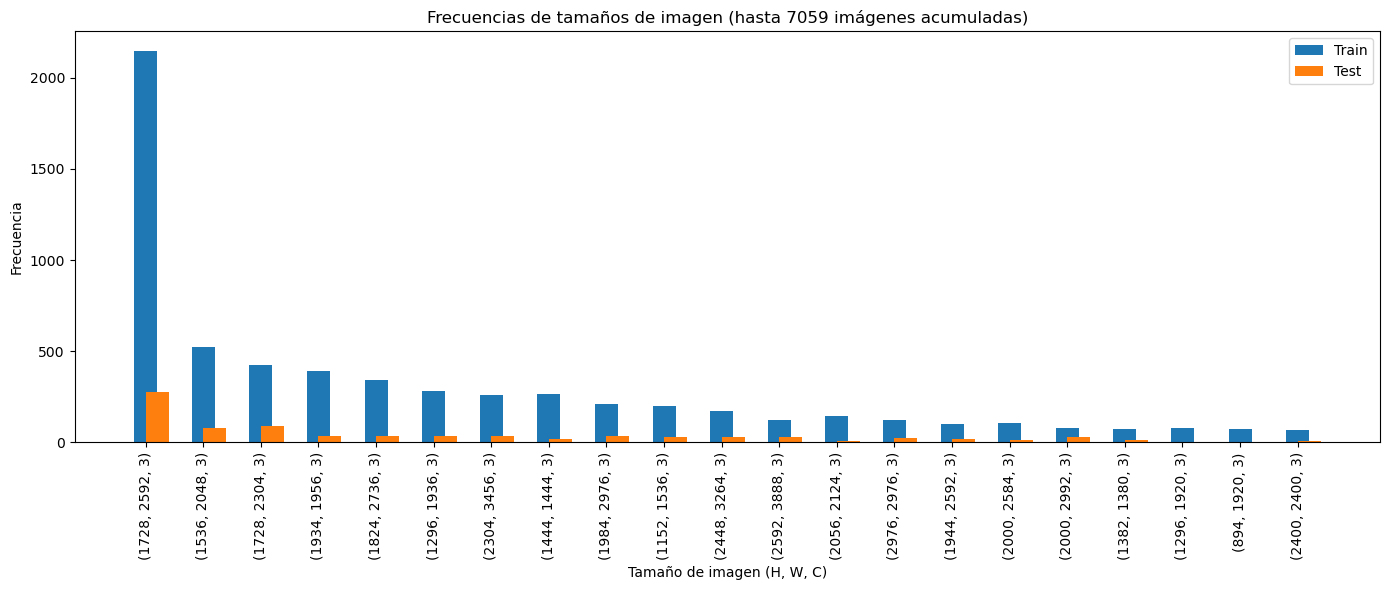

In [23]:
##Graficas de shapes Train vs Test mas claro 
import matplotlib.pyplot as plt

# DataFrame hasta el acumulado de 7059 
df_cut = df_shapes[df_shapes['acumulado'] <= 7059]


plt.figure(figsize=(14, 6))
x_labels = [str(shape) for shape in df_cut['shape']]
x = range(len(df_cut))

plt.bar(x, df_cut['count_train'], width=0.4, label='Train', align='center')
plt.bar(x, df_cut['count_test'], width=0.4, label='Test', align='edge')


plt.xticks(x, x_labels, rotation=90)
plt.xlabel("Tamaño de imagen (H, W, C)")
plt.ylabel("Frecuencia")
plt.title("Frecuencias de tamaños de imagen (hasta 7059 imágenes acumuladas)")
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()

ANALISIS ESTADISTICO DE COLOR

Considero valorar posibles fluctuaciones de brillo , contraste o colores para poder posteriormente en la etapa de preprocesamiento considerarlo a efectos de normalizacion o data aumentation.

Se hace especialmente relevante para los casos de deteccion de Retinopatia Diabetica y Edema Macular Diabetico la informacion del canal rojo y verde para detectar microhemorragias asi como exudados

Analizo en primer lugar los grises para detectar sobreeexposicion , contraste y dominancia de fondos negros. 

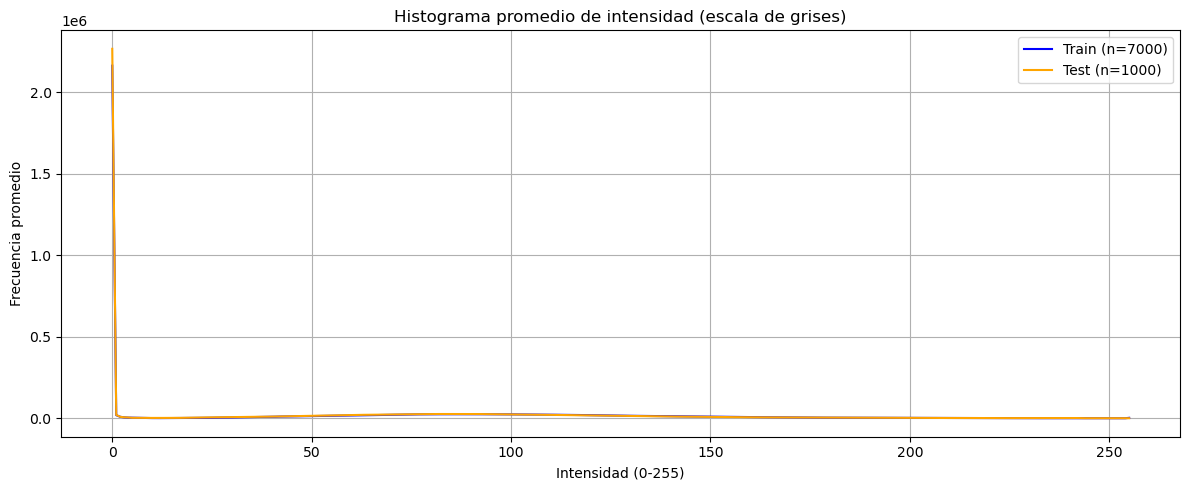

In [1]:
#Graficas de grises     

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calcular_histograma_grises(directorio):
    image_paths = [os.path.join(directorio, fname) for fname in os.listdir(directorio) if fname.endswith('.jpg')]
    hist_total = np.zeros(256)

    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
        hist_total += hist

    if len(image_paths) > 0:
        hist_total /= len(image_paths)  
    return hist_total, len(image_paths)


train_dir = "../ODIR-5K/ODIR-5K/Training Images"
test_dir  = "../ODIR-5K/ODIR-5K/Testing Images"

# Histogramas
hist_train, n_train = calcular_histograma_grises(train_dir)
hist_test, n_test   = calcular_histograma_grises(test_dir)


plt.figure(figsize=(12, 5))
plt.plot(hist_train, label=f'Train (n={n_train})', color='blue')
plt.plot(hist_test, label=f'Test (n={n_test})', color='orange')
plt.title("Histograma promedio de intensidad (escala de grises)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

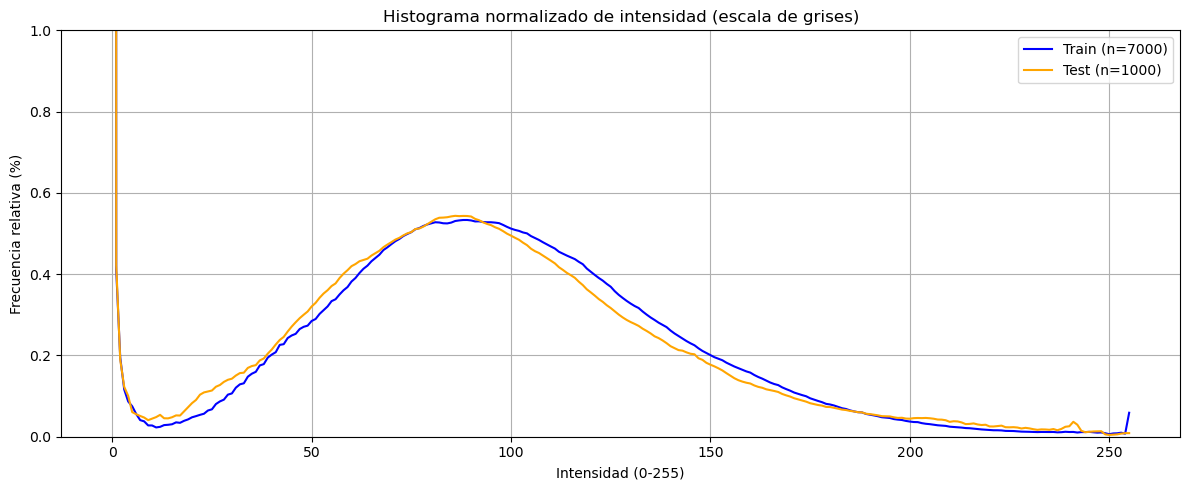

In [2]:
#Graficas de grises de una manera mas clara normalizando el histograma
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calcular_histograma_grises(directorio):
    image_paths = [os.path.join(directorio, fname) for fname in os.listdir(directorio) if fname.endswith('.jpg')]
    hist_total = np.zeros(256)

    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
        hist_total += hist

    if len(image_paths) > 0:
        hist_total /= hist_total.sum()  
        hist_total *= 100  
    return hist_total, len(image_paths)


train_dir = "../ODIR-5K/ODIR-5K/Training Images"
test_dir  = "../ODIR-5K/ODIR-5K/Testing Images"

# Histogramas
hist_train, n_train = calcular_histograma_grises(train_dir)
hist_test, n_test   = calcular_histograma_grises(test_dir)


plt.figure(figsize=(12, 5))
plt.plot(hist_train, label=f'Train (n={n_train})', color='blue')
plt.plot(hist_test, label=f'Test (n={n_test})', color='orange')
plt.title("Histograma normalizado de intensidad (escala de grises)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia relativa (%)")
plt.ylim(0, 1.0)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analisis de los canales de Rojo & Verde

In [5]:
import os

train_dir = "../ODIR-5K/ODIR-5K/Training Images"
test_dir  = "../ODIR-5K/ODIR-5K/Testing Images"


train_image_paths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith('.jpg')]
test_image_paths = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.jpg')]

In [6]:
#Analisis de rojo y verde
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

def calcular_histograma_rgb(image_paths):
    r_hist = np.zeros(256)
    g_hist = np.zeros(256)

    for path in tqdm(image_paths):
        img = cv2.imread(path)
        if img is None:
            continue
        r_channel = img[:, :, 2]  
        g_channel = img[:, :, 1]  

        r_hist += cv2.calcHist([r_channel], [0], None, [256], [0, 256]).ravel()
        g_hist += cv2.calcHist([g_channel], [0], None, [256], [0, 256]).ravel()

    # Promediar
    r_hist /= len(image_paths)
    g_hist /= len(image_paths)

    return r_hist, g_hist

In [7]:

train_r_hist, train_g_hist = calcular_histograma_rgb(train_image_paths)
test_r_hist, test_g_hist = calcular_histograma_rgb(test_image_paths)

100%|██████████| 1000/1000 [00:45<00:00, 22.10it/s]


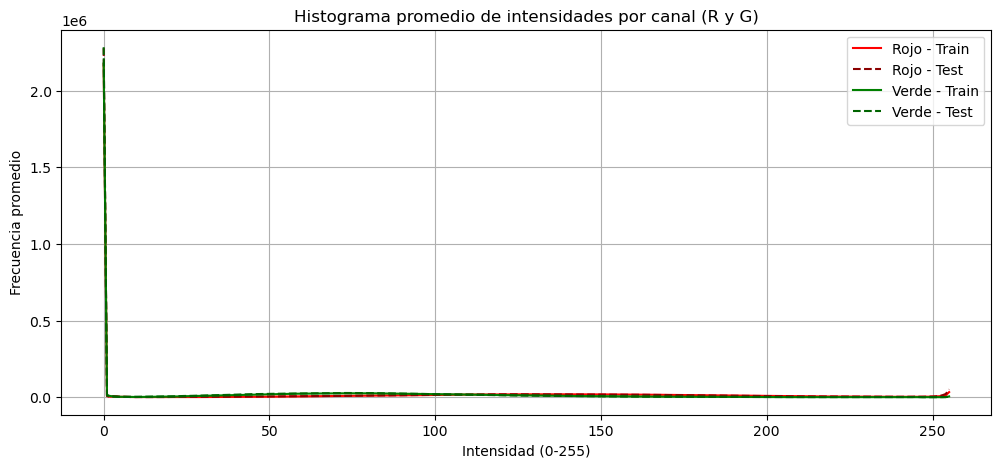

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(train_r_hist, color='red', label='Rojo - Train')
plt.plot(test_r_hist, color='darkred', linestyle='--', label='Rojo - Test')

plt.plot(train_g_hist, color='green', label='Verde - Train')
plt.plot(test_g_hist, color='darkgreen', linestyle='--', label='Verde - Test')

plt.title("Histograma promedio de intensidades por canal (R y G)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia promedio")
plt.legend()
plt.grid(True)
plt.show()

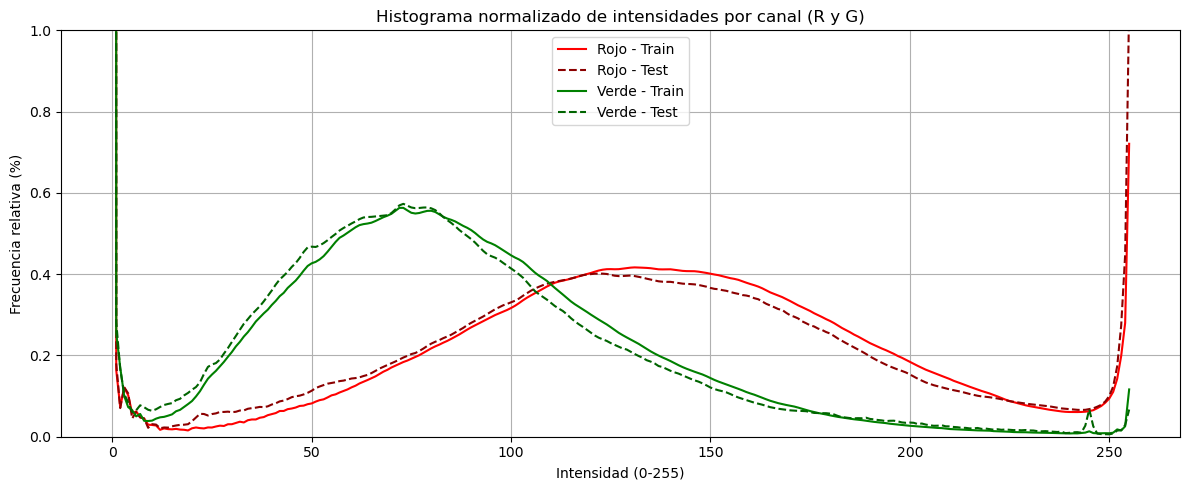

In [9]:
# histograma normalizado para colores R y G
def normalizar_histograma(hist):
    return hist / hist.sum() * 100  # puedes cambiar 100 por 1 si prefieres escala 0–1

# Normalizamos
train_r_hist_norm = normalizar_histograma(train_r_hist)
test_r_hist_norm  = normalizar_histograma(test_r_hist)
train_g_hist_norm = normalizar_histograma(train_g_hist)
test_g_hist_norm  = normalizar_histograma(test_g_hist)

# Graficamos
plt.figure(figsize=(12, 5))

plt.plot(train_r_hist_norm, color='red', label='Rojo - Train')
plt.plot(test_r_hist_norm, color='darkred', linestyle='--', label='Rojo - Test')

plt.plot(train_g_hist_norm, color='green', label='Verde - Train')
plt.plot(test_g_hist_norm, color='darkgreen', linestyle='--', label='Verde - Test')

plt.title("Histograma normalizado de intensidades por canal (R y G)")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia relativa (%)")
plt.ylim(0, 1.0)  # 🔎 Recorte visual más efectivo tras normalizar
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# (Sara): Añado detección de imágenes oscuras o con bajo contraste


# Umbrales (ajustables) los valores se han ajustado tras varias pruebas
DARK_THRESHOLD = 30  # Media de intensidad por debajo de esto se considera oscura
LOW_CONTRAST_THRESHOLD = 35  # Desviación estándar por debajo de esto es bajo contraste

def analyze_image_quality(image_path):
    """
    Analiza una imagen para detectar si es oscura o de bajo contraste
    Devuelve:
    - is_dark: booleano si la imagen es oscura
    - is_low_contrast: booleano si la imagen tiene bajo contraste
    - brightness: valor medio de intensidad (0-255)
    - contrast: desviación estándar de intensidad
    - hist: histograma de la imagen en escala de grises
    """
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    brightness = np.mean(gray)
    contrast = np.std(gray)
  
 
    is_dark = brightness < DARK_THRESHOLD
    is_low_contrast = contrast < LOW_CONTRAST_THRESHOLD
    
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).ravel()
    
    return {
        'is_dark': is_dark,
        'is_low_contrast': is_low_contrast,
        'brightness': brightness,
        'contrast': contrast,
        'hist': hist
    }


In [10]:
def analyze_dataset(image_dir, sample_size=None):
    """
    Analiza todas las imágenes en un directorio para detectar problemas de calidad
    """
    image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    if sample_size:
        image_paths = random.sample(image_paths, sample_size)
    
    results = []
    dark_images = []
    low_contrast_images = []
    
    for path in tqdm(image_paths, desc="Analizando imágenes"):
        analysis = analyze_image_quality(path)
        if analysis:
            results.append(analysis)
            if analysis['is_dark']:
                dark_images.append(path)
            if analysis['is_low_contrast']:
                low_contrast_images.append(path)
    
    # Calcular estadísticas generales
    brightness_values = [r['brightness'] for r in results]
    contrast_values = [r['contrast'] for r in results]
    
    stats = {
        'total_images': len(results),
        'dark_images': len(dark_images),
        'low_contrast_images': len(low_contrast_images),
        'mean_brightness': np.mean(brightness_values),
        'mean_contrast': np.mean(contrast_values),
        'dark_image_paths': dark_images,
        'low_contrast_paths': low_contrast_images
    }
    
    return stats, results

In [11]:
#train_dir = "../ODIR-5K/ODIR-5K/Training Images"

stats, individual_results = analyze_dataset(train_dir)

print("\n=== ESTADÍSTICAS GENERALES ===")
print(f"Total imágenes analizadas: {stats['total_images']}")
print(f"Imágenes oscuras detectadas: {stats['dark_images']} ({stats['dark_images']/stats['total_images']:.1%})")
print(f"Imágenes de bajo contraste detectadas: {stats['low_contrast_images']} ({stats['low_contrast_images']/stats['total_images']:.1%})")
print(f"Brillo promedio: {stats['mean_brightness']:.1f}")
print(f"Contraste promedio: {stats['mean_contrast']:.1f}")

# Visualizar distribución de brillo y contraste
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist([r['brightness'] for r in individual_results], bins=50, color='blue', alpha=0.7)
plt.axvline(x=30, color='red', linestyle='--', label='Umbral oscuro')
plt.title('Distribución de Brillo')
plt.xlabel('Valor medio de intensidad')
plt.ylabel('Número de imágenes')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([r['contrast'] for r in individual_results], bins=50, color='green', alpha=0.7)
plt.axvline(x=35, color='red', linestyle='--', label='Umbral bajo contraste')
plt.title('Distribución de Contraste')
plt.xlabel('Desviación estándar de intensidad')
plt.ylabel('Número de imágenes')
plt.legend()

plt.tight_layout()
plt.show()

Analizando imágenes:  15%|█▌        | 1065/7000 [00:27<02:32, 38.86it/s]


KeyboardInterrupt: 

In [ ]:
#(David) Utilizo la misma tecnica de analisis de Sara para evaluar tambien el subconjunto Test. Tenemos un split "heredado" y minimizamos riesgos en esta fase del EDA si lo valoramos tambien. 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random


# Ruta a los directorios
train_dir = "../ODIR-5K/ODIR-5K/Training Images"
test_dir  = "../ODIR-5K/ODIR-5K/Testing Images"

# Analisis de calidad   
def analyze_image_quality(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray)
    contrast = np.std(gray)
    
    DARK_THRESHOLD = 30
    LOW_CONTRAST_THRESHOLD = 35

    return {
        'is_dark': brightness < DARK_THRESHOLD,
        'is_low_contrast': contrast < LOW_CONTRAST_THRESHOLD,
        'brightness': brightness,
        'contrast': contrast
    }

# Función para analizar el conjunto 
def analyze_dataset(image_dir, sample_size=None):
    image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]
    if sample_size:
        image_paths = random.sample(image_paths, sample_size)

    results = []
    for path in tqdm(image_paths, desc=f"Analizando imágenes en {os.path.basename(image_dir)}"):
        analysis = analyze_image_quality(path)
        if analysis:
            results.append(analysis)

    brightness_values = [r['brightness'] for r in results]
    contrast_values = [r['contrast'] for r in results]

    stats = {
        'total_images': len(results),
        'dark_images': sum(r['is_dark'] for r in results),
        'low_contrast_images': sum(r['is_low_contrast'] for r in results),
        'mean_brightness': np.mean(brightness_values),
        'mean_contrast': np.mean(contrast_values),
        'results': results
    }

    return stats

# Analisis train & test
stats_train = analyze_dataset(train_dir)
stats_test  = analyze_dataset(test_dir)

#Resultados individuales 
print("\n=== TRAIN ===")
print(f"Total imágenes: {stats_train['total_images']}")
print(f"Oscuras: {stats_train['dark_images']} ({stats_train['dark_images'] / stats_train['total_images']:.1%})")
print(f"Bajo contraste: {stats_train['low_contrast_images']} ({stats_train['low_contrast_images'] / stats_train['total_images']:.1%})")
print(f"Brillo medio: {stats_train['mean_brightness']:.1f}")
print(f"Contraste medio: {stats_train['mean_contrast']:.1f}")

print("\n=== TEST ===")
print(f"Total imágenes: {stats_test['total_images']}")
print(f"Oscuras: {stats_test['dark_images']} ({stats_test['dark_images'] / stats_test['total_images']:.1%})")
print(f"Bajo contraste: {stats_test['low_contrast_images']} ({stats_test['low_contrast_images'] / stats_test['total_images']:.1%})")
print(f"Brillo medio: {stats_test['mean_brightness']:.1f}")
print(f"Contraste medio: {stats_test['mean_contrast']:.1f}")

#Resultados acumulados 
total_images = stats_train['total_images'] + stats_test['total_images']
total_dark = stats_train['dark_images'] + stats_test['dark_images']
total_low_contrast = stats_train['low_contrast_images'] + stats_test['low_contrast_images']
combined_brightness = np.mean([r['brightness'] for r in stats_train['results'] + stats_test['results']])
combined_contrast = np.mean([r['contrast'] for r in stats_train['results'] + stats_test['results']])

print("\n=== ACUMULADO GLOBAL (TRAIN + TEST) ===")
print(f"Total imágenes: {total_images}")
print(f"Oscuras: {total_dark} ({total_dark / total_images:.1%})")
print(f"Bajo contraste: {total_low_contrast} ({total_low_contrast / total_images:.1%})")
print(f"Brillo medio: {combined_brightness:.1f}")
print(f"Contraste medio: {combined_contrast:.1f}")

Analizando imágenes en Testing Images: 100%|██████████| 1000/1000 [00:38<00:00, 25.72it/s]


=== TRAIN ===
Total imágenes: 7000
Oscuras: 516 (7.4%)
Bajo contraste: 850 (12.1%)
Brillo medio: 54.3
Contraste medio: 52.8

=== TEST ===
Total imágenes: 1000
Oscuras: 104 (10.4%)
Bajo contraste: 143 (14.3%)
Brillo medio: 53.0
Contraste medio: 51.8

=== ACUMULADO GLOBAL (TRAIN + TEST) ===
Total imágenes: 8000
Oscuras: 620 (7.8%)
Bajo contraste: 993 (12.4%)
Brillo medio: 54.2
Contraste medio: 52.6


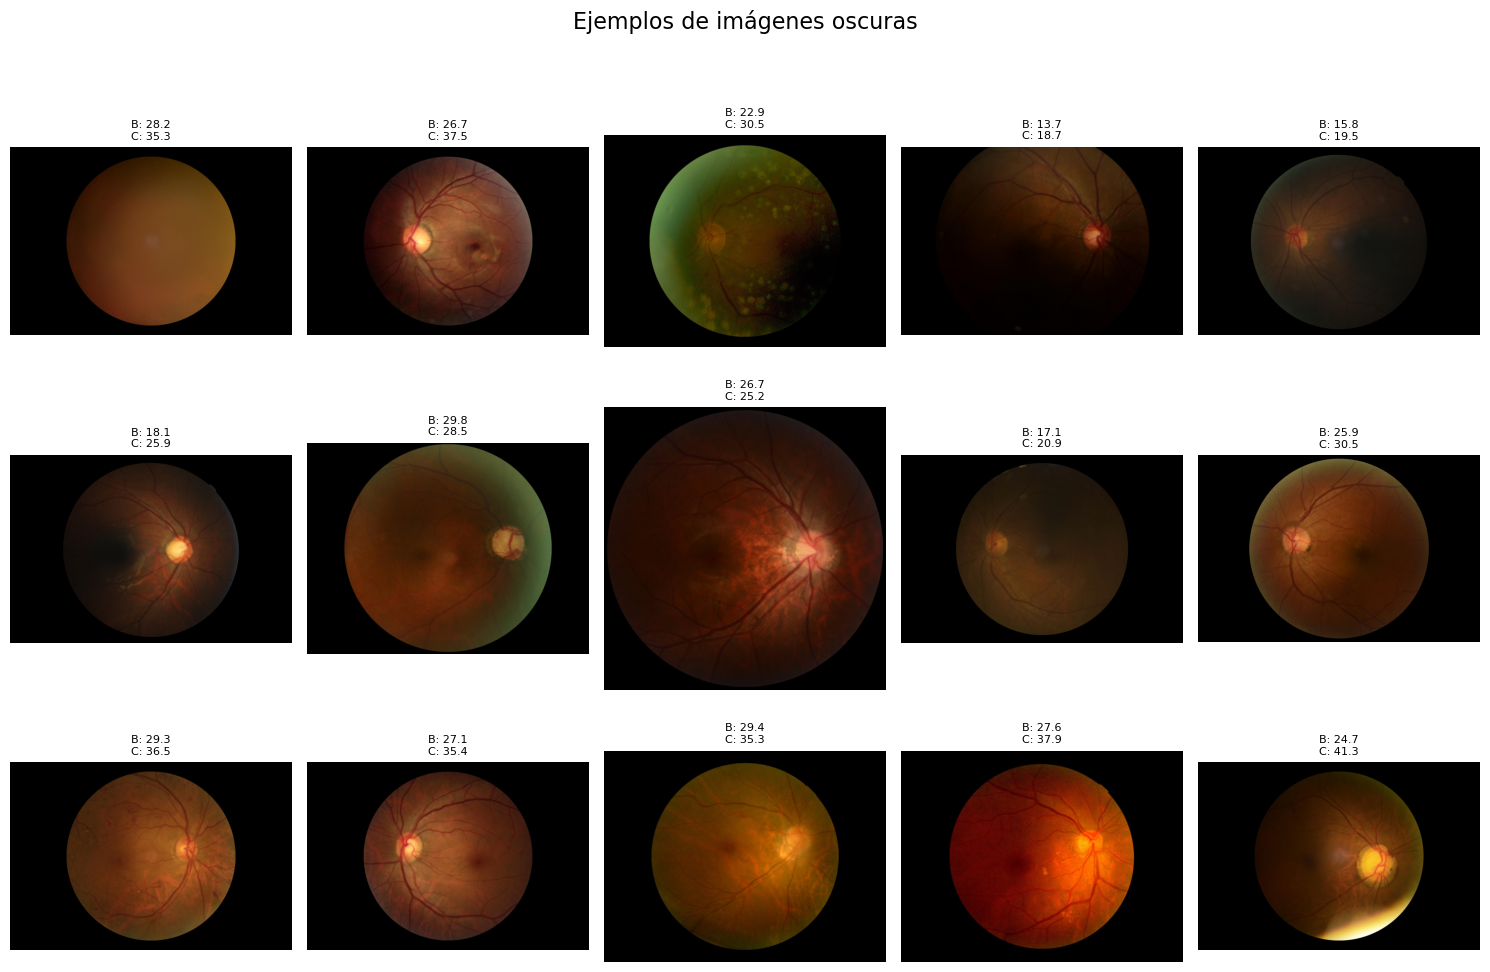

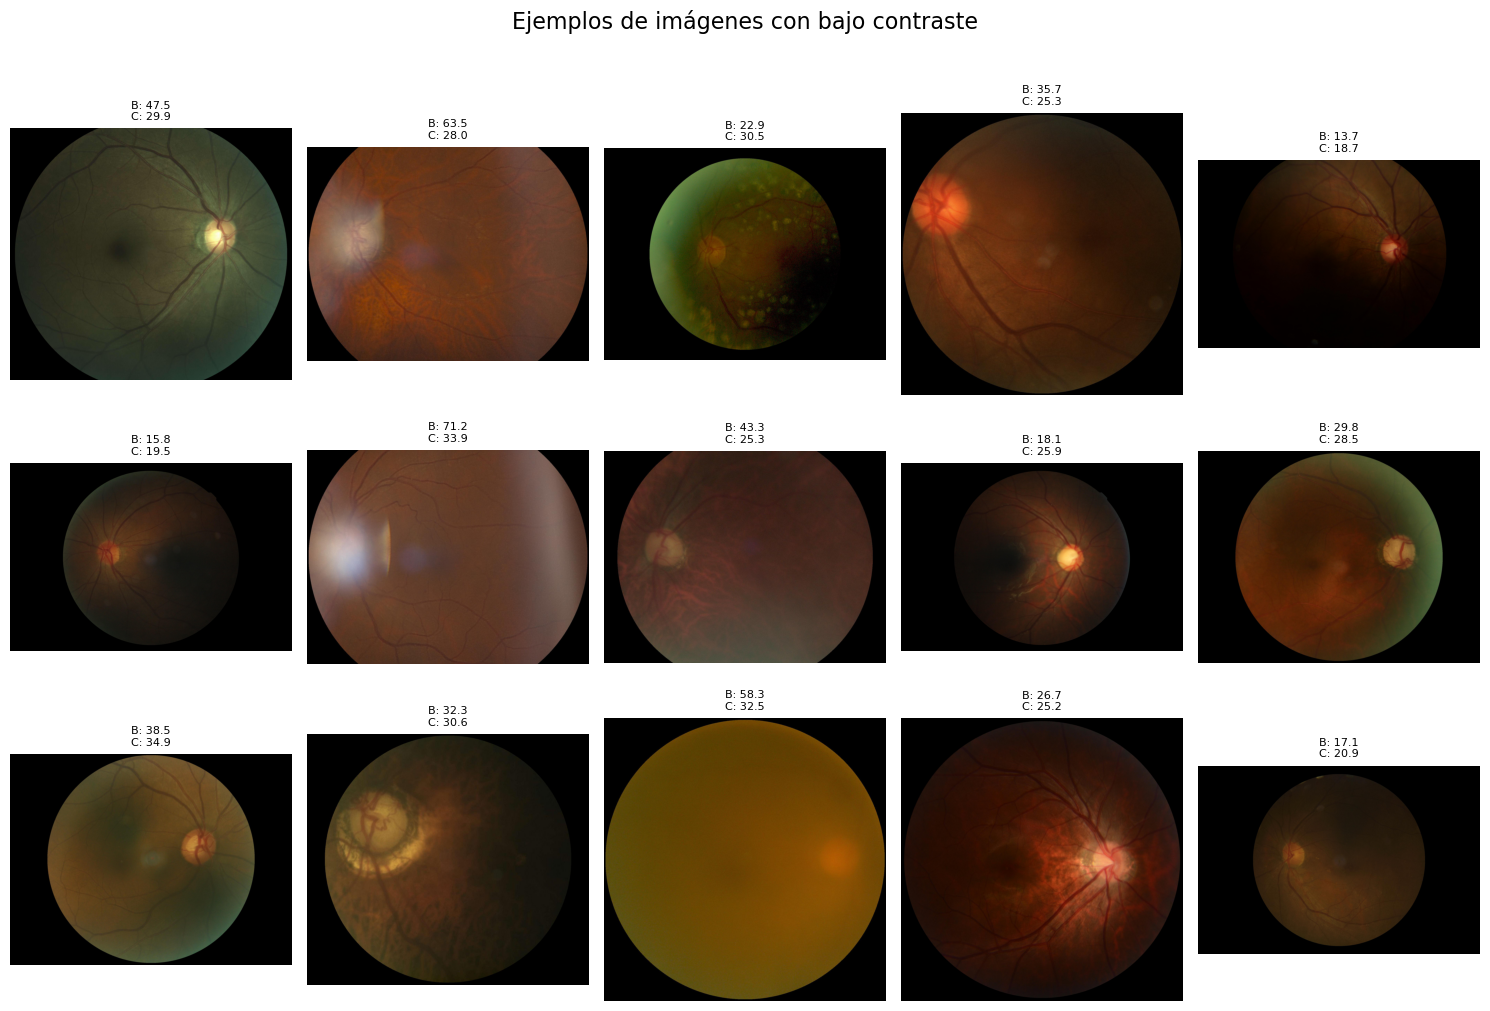

In [ ]:
def display_examples(image_paths, title):
    """Muestra un grid con ejemplos de imágenes problemáticas"""
    plt.figure(figsize=(15, 10))
    plt.suptitle(title, y=1.02, fontsize=16)
    
    for i, path in enumerate(image_paths[:15]):
        plt.subplot(3, 5, i+1)
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        
        # Mostrar brillo y contraste en la imagen
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(gray)
        contrast = np.std(gray)
        plt.title(f"B: {brightness:.1f}\nC: {contrast:.1f}", fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Ejemplos de imágenes oscuras
if stats['dark_images'] > 0:
    display_examples(stats['dark_image_paths'], "Ejemplos de imágenes oscuras")

# Ejemplos de imágenes con bajo contraste
if stats['low_contrast_images'] > 0:
    display_examples(stats['low_contrast_paths'], "Ejemplos de imágenes con bajo contraste")

## Distribución de las imágenes oscuras y bajo contraste

In [ ]:
# Crear DataFrame de calidad de imágen 
quality_data = []
for idx, row in df.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    analysis = analyze_image_quality(img_path)
    if analysis:
        quality_data.append({
            'filename': row['filename'],
            'brightness': analysis['brightness'],
            'contrast': analysis['contrast'],
            'is_dark': analysis['is_dark'],
            'is_low_contrast': analysis['is_low_contrast'],
            'labels': row['labels'] 
        })

quality_df = pd.DataFrame(quality_data)

labels_expanded = quality_df['labels'].apply(lambda x: ''.join(eval(x)) if isinstance(x, str) else ''.join(x)).str.get_dummies()
quality_df = pd.concat([quality_df.drop('labels', axis=1), labels_expanded], axis=1)

In [25]:
quality_df.head(5)

,filename,brightness,contrast,is_dark,is_low_contrast,A,C,D,G,H,M,N,O
0,0_right.jpg,33.274280,30.609474,False,True,0,0,0,0,0,0,1,0
1,1_right.jpg,53.834958,65.333838,False,False,0,0,0,0,0,0,1,0
2,2_right.jpg,34.812584,35.673807,False,False,0,0,1,0,0,0,0,0
3,4_right.jpg,50.609196,64.242010,False,False,0,0,1,0,0,0,0,0
4,5_right.jpg,71.283488,57.147460,False,False,0,0,1,0,0,0,0,0


/var/folders/06/z65nxc8d4ndbyys77v83c4q40000gn/T/ipykernel_23495/2171422136.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disease', y='% Dark', data=pct_dark_df, palette='viridis')


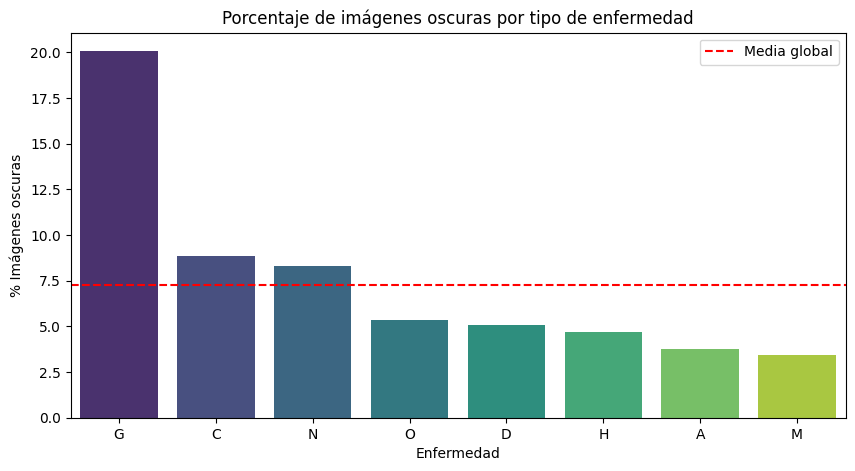

In [ ]:
diseases = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Ajustar según tu dataset

# Calcular % de imágenes oscuras por enfermedad
results = []
for disease in diseases:
    total = quality_df[disease].sum()
    dark = quality_df[(quality_df[disease] == 1) & (quality_df['is_dark'])].shape[0]
    pct = (dark / total) * 100 if total > 0 else 0
    results.append({'Disease': disease, 'Total': total, 'Dark': dark, '% Dark': pct})

pct_dark_df = pd.DataFrame(results).sort_values('% Dark', ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x='Disease', y='% Dark', data=pct_dark_df, palette='viridis')
plt.title('Porcentaje de imágenes oscuras por tipo de enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('% Imágenes oscuras')
plt.axhline(y=quality_df['is_dark'].mean() * 100, color='red', linestyle='--', 
            label='Media global')
plt.legend()
plt.show()

En la gráfica de arriba vemos que la mayoría de las imágenes oscuras corresponden a la enfermedad de "Glaucoma" por lo que lo recomendable sería intentar modificar dichas imágenes en lugar de eliminarlas.

El hecho de que muchas de las imágenes oscuras se encuentren en algunas enfermedades, podría implicar que es un factor clave para su diagnóstico y además sugiere que en el preprocesamiento, las imagenes de cada enfermedad podrían ajustarse separadamente.  

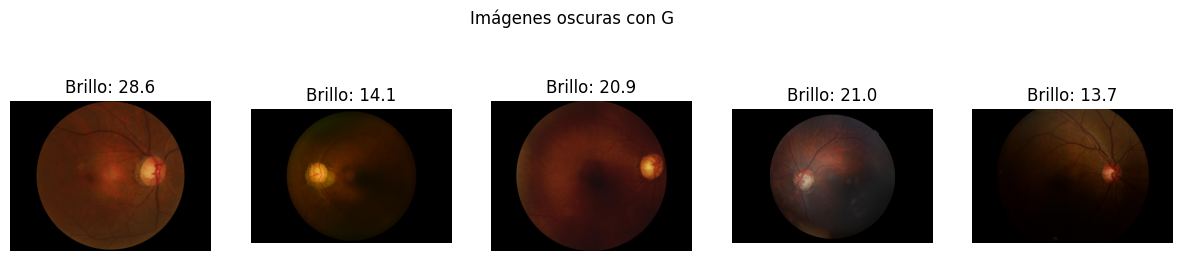

In [40]:
def plot_dark_images_by_disease(disease, n_samples=5):
    dark_samples = quality_df[(quality_df[disease] == 1) & 
                            (quality_df['is_dark'])].sample(n_samples)
    
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(dark_samples.iterrows()):
        img = cv2.imread(os.path.join(train_dir, row['filename']))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img)
        plt.title(f"Brillo: {row['brightness']:.1f}")
        plt.axis('off')
    plt.suptitle(f'Imágenes oscuras con {disease}', y=1.05)
    plt.show()

# Ejemplo para glaucoma ('G')
plot_dark_images_by_disease('G')

In [50]:
# Mostrar tabla con el porcentaje de imágenes oscuras por enfermedad
tabla_pct_oscuras = resultados_enfermedades[['enfermedad', 'total_imagenes', 'imagenes_oscuras', 'pct_oscuras']]
tabla_pct_oscuras = tabla_pct_oscuras.rename(columns={
    'enfermedad': 'Disease',
    'total_imagenes': 'Total Images',
    'imagenes_oscuras': 'Dark Images',
    'pct_oscuras': '% Dark'
})
display(tabla_pct_oscuras)

,Disease,Total Images,Dark Images,% Dark
1,G,284,57,20.070423
2,C,293,26,8.873720
7,N,2873,239,8.318830
6,O,708,38,5.367232
0,D,1608,82,5.099502
4,H,128,6,4.687500
3,A,266,10,3.759398
5,M,232,8,3.448276


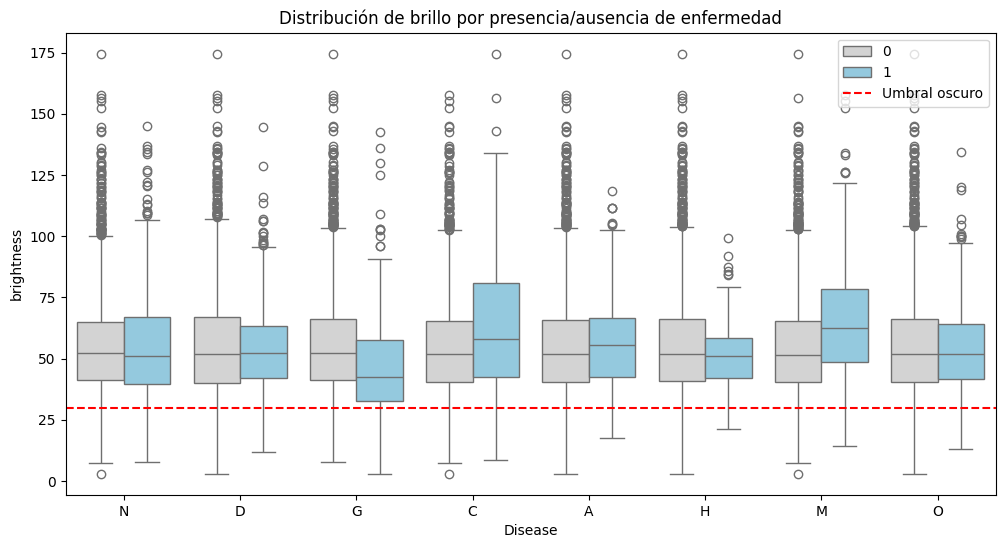

In [45]:
# distribucion de brillo por enfermedad
plt.figure(figsize=(12, 6))
sns.boxplot(data=quality_df.melt(id_vars=['brightness'], 
                                value_vars=diseases, 
                                var_name='Disease', 
                                value_name='HasDisease'),
            x='Disease', 
            y='brightness', 
            hue='HasDisease',
            palette={0: 'lightgray', 1: 'skyblue'})
plt.title('Distribución de brillo por presencia/ausencia de enfermedad')
plt.axhline(y=DARK_THRESHOLD, color='red', linestyle='--', label='Umbral oscuro')
plt.legend()
plt.show()

In [46]:
from scipy.stats import ttest_ind

for disease in diseases:
    group1 = quality_df[quality_df[disease] == 1]['brightness']
    group0 = quality_df[quality_df[disease] == 0]['brightness']
    t_stat, p_val = ttest_ind(group1, group0, equal_var=False)
    print(f"{disease}: p-value = {p_val:.4f} (Brillo medio: {group1.mean():.1f} vs {group0.mean():.1f})")

N: p-value = 0.0164 (Brillo medio: 53.9 vs 55.0)
D: p-value = 0.0718 (Brillo medio: 53.8 vs 54.7)
G: p-value = 0.0000 (Brillo medio: 46.8 vs 54.9)
C: p-value = 0.0000 (Brillo medio: 62.8 vs 54.1)
A: p-value = 0.0611 (Brillo medio: 56.6 vs 54.4)
H: p-value = 0.0208 (Brillo medio: 51.6 vs 54.6)
M: p-value = 0.0000 (Brillo medio: 65.9 vs 54.1)
O: p-value = 0.7572 (Brillo medio: 54.3 vs 54.5)


## Propuestas para la transformación de imágenes (a valorar conjuntamente)

A partir del análisis de imágenes, se proponen las siguientes acciones, sin perjuicio de considerar otras adicionales:

---

### 1. Posible eliminación de las imágenes consideradas oscuras 

- Total afectado: **620 imágenes** (~**7,8%** del total).

---

### 2. Mejora mediante ecualización CLAHE
_Aplicable sobre el dataset completo o solo sobre imágenes de bajo contraste._

**Pros:**
- Mejora la detección de elementos poco visibles como **microaneurismas, neovasos o exudados**  
  _(no drusas, dado que no se trata de imágenes OCT)_.
- Ajuste local del contraste por zonas.
- Mejora del brillo (a priori, ya en buenos valores).

**Contras:**
- Puede amplificar el ruido en algunos casos.
- Método "manual" mediante *clip limit* para limitar la redistribución del histograma.
- No garantiza una mejora en el rendimiento del modelo.

---

### 3. Tamaño de redimensionamiento de las imágenes

Existe una **variedad importante de tamaños** en las imágenes.

- El tamaño más frecuente es **(1728, 2592, 3)** → **2.420 imágenes (~30%)**

  > Redimensionando a este tamaño y considerando un total de ~4.500 imágenes para entrenamiento,  
  > se estima una duración de **~20 minutos** en GCP con **GPU T4** (ResNet18, batch=16, 20 epochs)  
  > _(valoración aproximada según Gemini y ChatGPT)_.

  - Si se detectan cuellos de botella, considerar el uso de **GPUs superiores** como la **V100**.

- Alternativamente, se puede **reducir el tamaño** para ganar agilidad inicial y evitar:
  - pérdida de nitidez,
  - amplificación de ruido al escalar imágenes pequeñas.

  **Tamaños sugeridos:**
  - `1024 x 1024` (cuadrado)
  - `896 x 1344` (proporción ≈ 2:3)

  > Riesgo: pérdida de detalle.  
  > En el caso del formato rectangular, tener en cuenta que algunos modelos usan *flatten* fijo.  
  > Por ejemplo, **ResNet18** es compatible.

---

### 4. Tipo de redimensionamiento

Comparativa entre métodos:

- **`cv2.resize`**  
  - Redimensionamiento directo.  
  - Puede **deformar** las imágenes y perder información.

- **`resize` + padding**  
  - Ajusta las imágenes con relleno.  
  - No distorsiona, pero puede **introducir ruido** (usar colores neutros).

---